In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json
import warnings
import missingno as msno

warnings.filterwarnings("ignore")
pd.set_option('max.columns', 100)

import seaborn as sns

import lightgbm as lgb
import catboost as cab


In [2]:
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,precision_recall_fscore_support,roc_curve,auc,roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [3]:
path = "F:/2020/机器学习实验"

In [4]:
'***************************数据分析****************************'
base_info = pd.read_csv(path+"/dataset/train/base_info.csv")
annual_report_info = pd.read_csv(path+"/dataset/train/annual_report_info.csv")
tax_info = pd.read_csv(path+"/dataset/train/tax_info.csv")
change_info = pd.read_csv(path+"/dataset/train/change_info.csv")
news_info = pd.read_csv(path+"/dataset/train/news_info.csv")
other_info = pd.read_csv(path+"/dataset/train/other_info.csv")
entprise_info = pd.read_csv(path+"/dataset/train/entprise_info.csv")
entprise_evaluate = pd.read_csv(path+"/dataset/entprise_evaluate.csv")

base_info 数据大小
(24865, 33) 24865
id 24865
oplocdistrict 16
industryphy 20
industryco 345
dom 23278
opscope 20815
enttype 17
enttypeitem 31
opfrom 6620
opto 5746
state 6
orgid 78
jobid 434
adbusign 2
townsign 2
regtype 3
empnum 62
compform 2
parnum 51
exenum 50
opform 33
ptbusscope 0
venind 3
enttypeminu 26
midpreindcode 0
protype 2
oploc 5351
regcap 1143
reccap 597
forreccap 11
forregcap 38
congro 33
enttypegb 53


,oplocdistrict,industryco,enttype,enttypeitem,state,orgid,jobid,adbusign,townsign,regtype,empnum,compform,parnum,exenum,ptbusscope,venind,enttypeminu,midpreindcode,protype,regcap,reccap,forreccap,forregcap,congro,enttypegb
oplocdistrict,1.000000,0.112593,0.121533,-0.041273,0.019492,-0.020198,0.078328,-0.008561,-0.033043,-0.042385,0.024939,0.028629,-0.073539,-0.008300,NaN,-0.081515,-0.176448,NaN,0.005271,-0.041067,-0.042661,-0.104363,-0.077224,-0.078097,0.121500
industryco,0.112593,1.000000,0.257469,-0.094717,0.030038,0.056266,0.048277,-0.002085,-0.058483,-0.051295,-0.044818,0.008104,-0.214439,-0.018191,NaN,-0.068183,-0.461538,NaN,-0.111578,-0.106896,-0.090893,-0.372025,-0.279505,-0.308839,0.257281
enttype,0.121533,0.257469,1.000000,0.999932,-0.027878,0.179735,-0.178680,-0.042500,0.346220,-0.097321,-0.034183,0.023962,0.261070,-0.000758,NaN,0.275222,0.999996,NaN,-0.086552,-0.008691,0.094448,0.212679,0.184072,0.184857,0.999995
enttypeitem,-0.041273,-0.094717,0.999932,1.000000,-0.010287,0.026695,-0.166773,-0.025031,0.224193,-0.032974,0.021419,NaN,0.260897,-0.000758,NaN,0.162243,1.000000,NaN,-0.082266,0.158789,0.100358,0.454545,0.317294,0.321941,1.000000
state,0.019492,0.030038,-0.027878,-0.010287,1.000000,-0.010450,-0.025917,0.005841,0.055396,-0.001333,-0.009471,0.016457,-0.012364,-0.004302,NaN,-0.022642,-0.083751,NaN,0.144005,-0.016389,-0.029711,-0.046624,-0.041558,-0.043007,-0.027873
orgid,-0.020198,0.056266,0.179735,0.026695,-0.010450,1.000000,0.100055,-0.007011,0.059033,-0.014396,-0.012030,0.014091,-0.059041,-0.008210,NaN,-0.023426,-0.134803,NaN,0.102869,-0.010051,-0.001102,0.003824,0.003426,0.003553,0.179710
jobid,0.078328,0.048277,-0.178680,-0.166773,-0.025917,0.100055,1.000000,-0.022339,-0.274408,-0.013339,0.018536,-0.007621,-0.246189,-0.008265,NaN,-0.009625,-0.245806,NaN,-0.080584,-0.028447,-0.017728,-0.019219,0.000662,0.013314,-0.178719
adbusign,-0.008561,-0.002085,-0.042500,-0.025031,0.005841,-0.007011,-0.022339,1.000000,-0.016126,-0.003955,-0.013402,-0.003266,NaN,NaN,NaN,NaN,-0.021901,NaN,NaN,-0.000085,0.002786,-0.032364,-0.028940,-0.030020,-0.042538
townsign,-0.033043,-0.058483,0.346220,0.224193,0.055396,0.059033,-0.274408,-0.016126,1.000000,-0.072162,-0.028617,0.007102,0.253791,0.012175,NaN,0.010278,0.372428,NaN,NaN,0.039094,0.027127,-0.077001,-0.068255,-0.070828,0.346336
regtype,-0.042385,-0.051295,-0.097321,-0.032974,-0.001333,-0.014396,-0.013339,-0.003955,-0.072162,1.000000,0.002866,0.008554,0.063020,-0.003083,NaN,-0.067663,-0.068709,NaN,-0.424139,0.002011,0.022605,0.083947,0.142100,0.142878,-0.097343


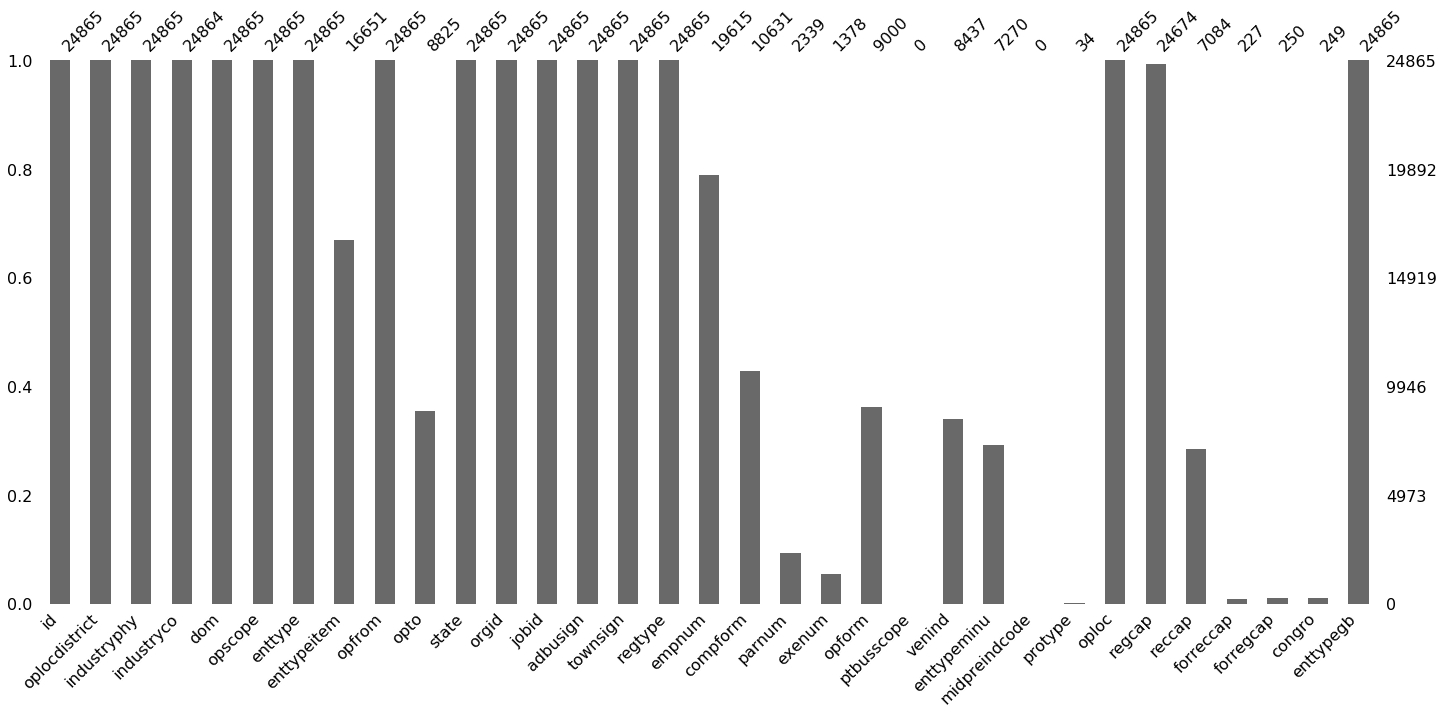

In [5]:
# ------------------base_info-------------------
print("base_info 数据大小")
print(base_info.shape, base_info['id'].nunique())
base_info.head(3)

# 查看缺失值
msno.bar(base_info)

# 查看表字段属性个数
for col in base_info.columns:
    print(col, base_info[col].nunique())

# corr协方差分析
base_info.corr()


annual_report_info 数据大小
(22550, 23) 8937
id 8937
ANCHEYEAR 4
STATE 2
FUNDAM 167
MEMNUM 5
FARNUM 6
ANNNEWMEMNUM 3
ANNREDMEMNUM 1
EMPNUM 270
EMPNUMSIGN 2
BUSSTNAME 4
COLGRANUM 43
RETSOLNUM 14
DISPERNUM 5
UNENUM 35
COLEMPLNUM 94
RETEMPLNUM 26
DISEMPLNUM 16
UNEEMPLNUM 72
WEBSITSIGN 2
FORINVESTSIGN 2
STOCKTRANSIGN 2
PUBSTATE 3


,ANCHEYEAR,STATE,FUNDAM,MEMNUM,FARNUM,ANNNEWMEMNUM,ANNREDMEMNUM,EMPNUM,EMPNUMSIGN,COLGRANUM,RETSOLNUM,DISPERNUM,UNENUM,COLEMPLNUM,RETEMPLNUM,DISEMPLNUM,UNEEMPLNUM,WEBSITSIGN,FORINVESTSIGN,STOCKTRANSIGN,PUBSTATE
ANCHEYEAR,1.000000,-0.028429,-0.009294,-0.327831,-0.310519,-0.222988,NaN,-0.010144,-0.028782,-0.027796,-0.027892,-0.059294,-0.041088,-0.033156,-0.022623,-0.022778,-0.037761,0.018431,-0.009265,0.026696,-0.062641
STATE,-0.028429,1.000000,0.000673,NaN,NaN,NaN,NaN,0.000701,NaN,0.002814,0.001235,0.002322,0.002517,0.003270,0.001667,0.001376,0.002633,-0.003682,NaN,NaN,NaN
FUNDAM,-0.009294,0.000673,1.000000,NaN,NaN,NaN,NaN,0.008824,NaN,0.017833,0.092984,0.141673,0.026251,0.017750,0.043397,0.037312,0.020091,0.001933,NaN,NaN,-0.063965
MEMNUM,-0.327831,NaN,NaN,1.000000,0.988550,0.188556,NaN,0.463955,0.061424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.187940,NaN,NaN,0.120477
FARNUM,-0.310519,NaN,NaN,0.988550,1.000000,0.127617,NaN,0.460931,0.098735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183098,NaN,NaN,0.135266
ANNNEWMEMNUM,-0.222988,NaN,NaN,0.188556,0.127617,1.000000,NaN,-0.056438,-0.262265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045667,NaN,NaN,0.036196
ANNREDMEMNUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EMPNUM,-0.010144,0.000701,0.008824,0.463955,0.460931,-0.056438,NaN,1.000000,0.002630,0.122588,0.060998,0.015312,0.047616,0.516367,0.095348,0.134756,0.260576,-0.133866,-0.086280,-0.023100,-0.001662
EMPNUMSIGN,-0.028782,NaN,NaN,0.061424,0.098735,-0.262265,NaN,0.002630,1.000000,-0.016601,-0.008479,-0.024508,-0.031518,-0.019965,-0.009287,-0.008402,-0.005831,0.048881,-0.000089,0.004895,0.772609
COLGRANUM,-0.027796,0.002814,0.017833,NaN,NaN,NaN,NaN,0.122588,-0.016601,1.000000,0.512305,0.091645,0.186155,0.430973,0.070891,0.019890,0.083566,-0.033859,0.000056,-0.007766,-0.027486


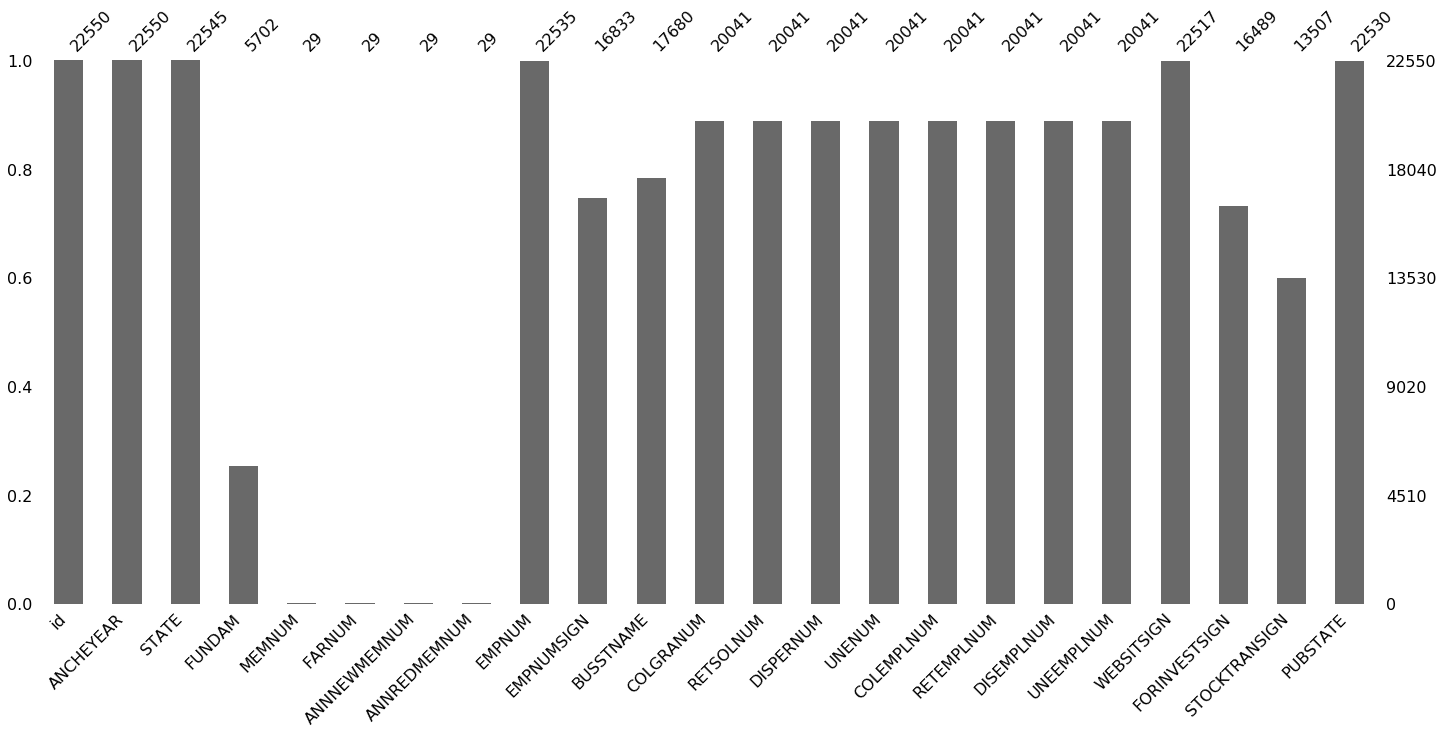

In [6]:
# ------------------annual_report_info-------------------
print("annual_report_info 数据大小")
print(annual_report_info.shape, annual_report_info['id'].nunique())
annual_report_info.head(3)

# 查看缺失值
msno.bar(annual_report_info)

# 查看表字段属性个数
for col in annual_report_info.columns:
    print(col, annual_report_info[col].nunique())

# corr协方差分析
annual_report_info.corr()

tax_info 数据大小
(29195, 9) 808
id 808
START_DATE 91
END_DATE 91
TAX_CATEGORIES 17
TAX_ITEMS 275
TAXATION_BASIS 1665
TAX_RATE 28
DEDUCTION 247
TAX_AMOUNT 4568


,TAXATION_BASIS,TAX_RATE,DEDUCTION,TAX_AMOUNT
TAXATION_BASIS,1.000000,-0.025323,-0.010943,0.221651
TAX_RATE,-0.025323,1.000000,0.507645,0.003519
DEDUCTION,-0.010943,0.507645,1.000000,0.054256
TAX_AMOUNT,0.221651,0.003519,0.054256,1.000000


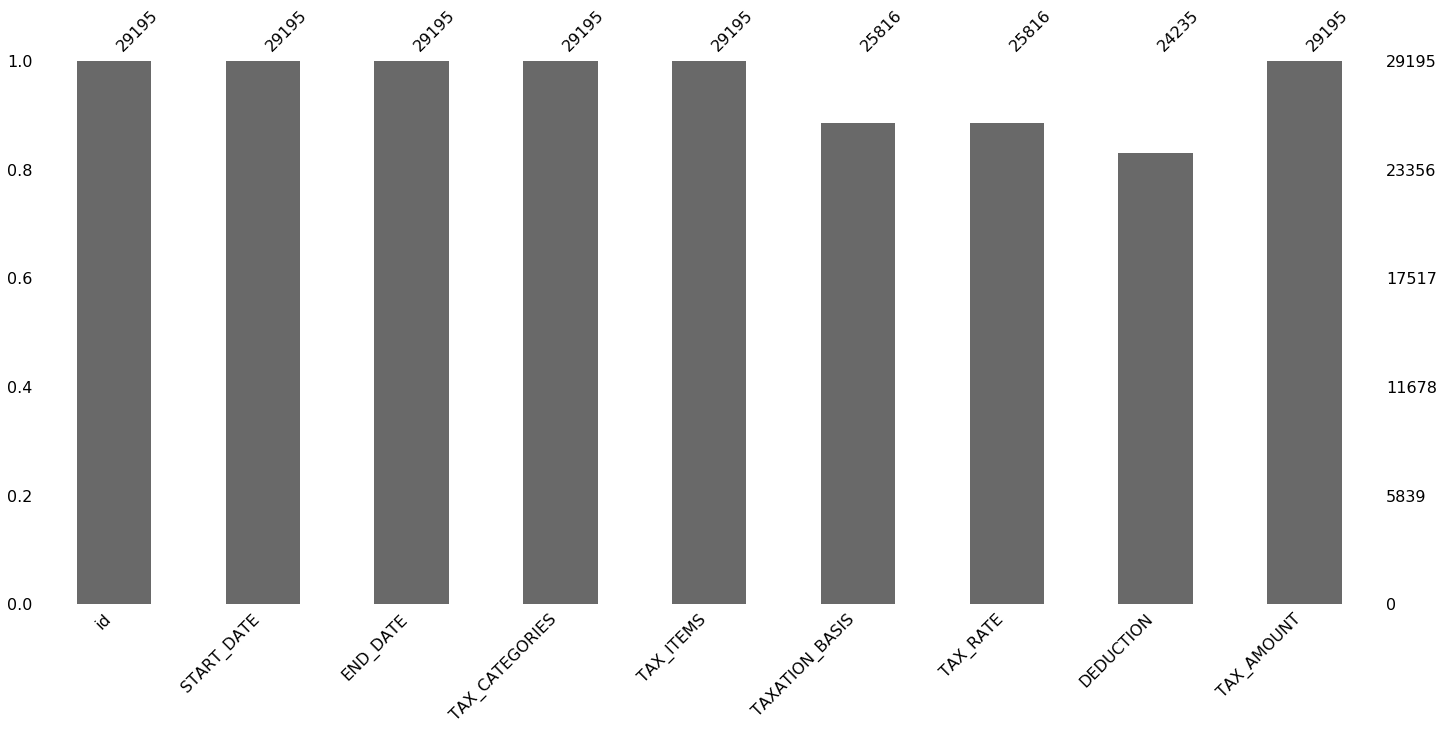

In [7]:
# ------------------tax_info-------------------
print("tax_info 数据大小")
print(tax_info.shape, tax_info['id'].nunique())
tax_info.head(3)

# 查看缺失值
msno.bar(tax_info)

# 查看表字段属性个数
for col in tax_info.columns:
    print(col, tax_info[col].nunique())

# corr协方差分析
tax_info.corr()

change_info 数据大小
(45940, 5) 8726
id 8726
bgxmdm 45
bgq 28802
bgh 30501
bgrq 23663


,bgxmdm,bgrq
bgxmdm,1.000000,0.178841
bgrq,0.178841,1.000000


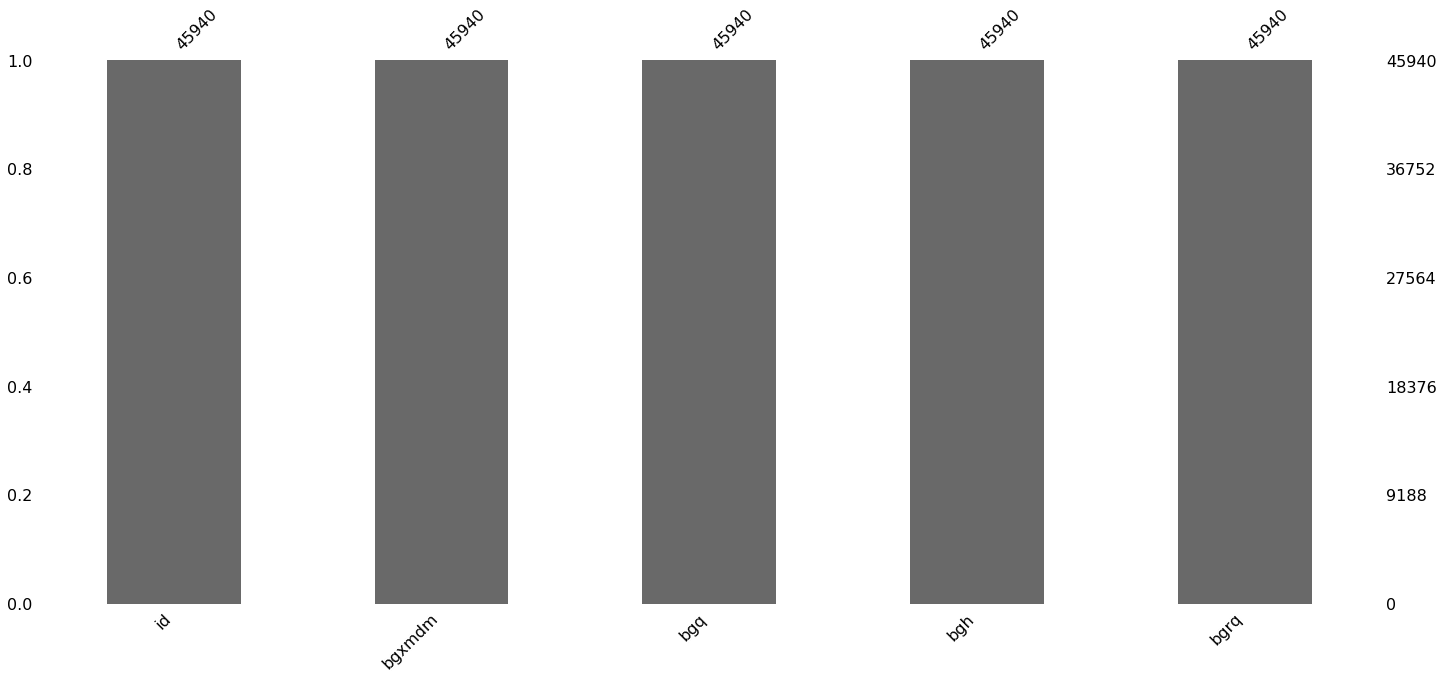

In [8]:
# ------------------change_info-------------------
print("change_info 数据大小")
print(change_info.shape, change_info['id'].nunique())
change_info.head(3)

# 查看缺失值
msno.bar(change_info)

# 查看表字段属性个数
for col in change_info.columns:
    print(col, change_info[col].nunique())

# corr协方差分析
change_info.corr()

news_info 数据大小
(10518, 3) 927
id 927
positive_negtive 3
public_date 2719


""


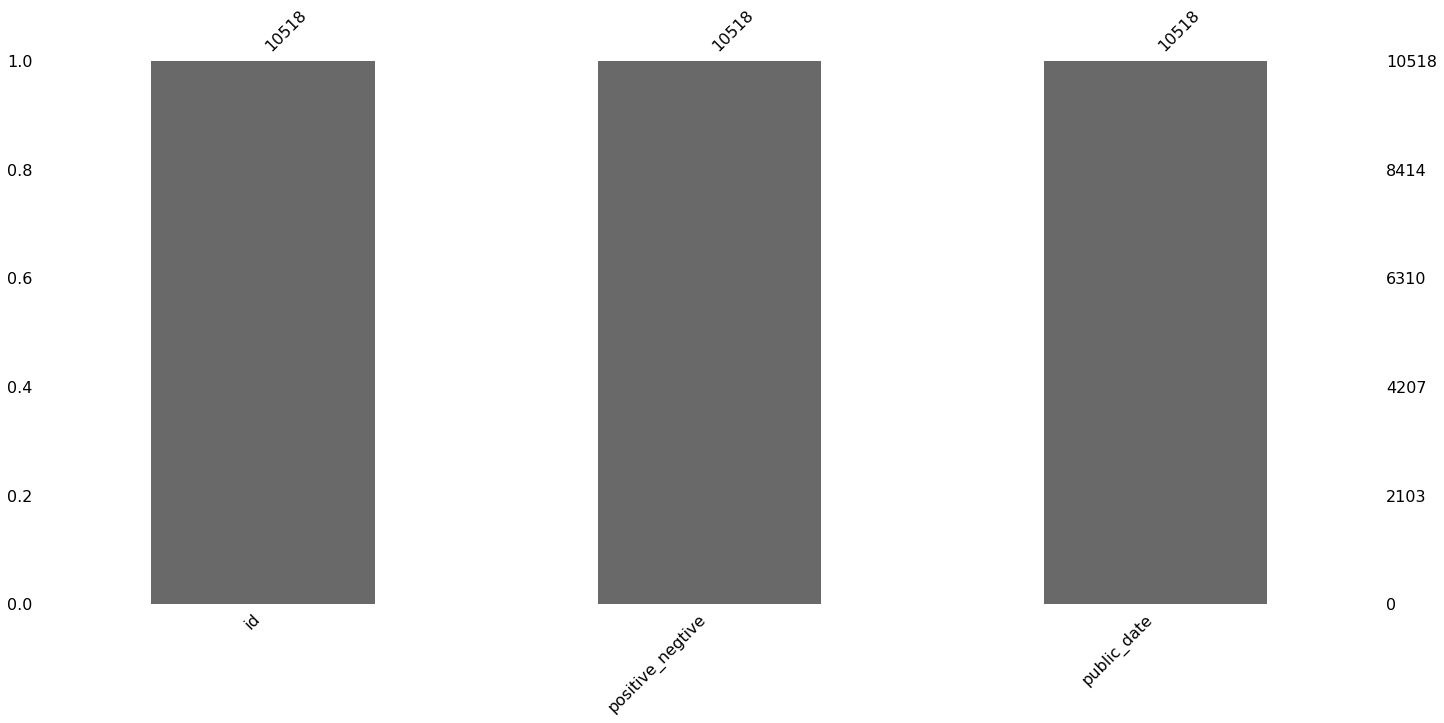

In [9]:
# ------------------news_info-------------------
print("news_info 数据大小")
print(news_info.shape, news_info['id'].nunique())
news_info.head(3)

# 查看缺失值
msno.bar(news_info)

# 查看表字段属性个数
for col in news_info.columns:
    print(col, news_info[col].nunique())

# corr协方差分析
news_info.corr()

other_info 数据大小
(1890, 4) 1888
id 1888
legal_judgment_num 93
brand_num 82
patent_num 114


,legal_judgment_num,brand_num,patent_num
legal_judgment_num,1.000000,0.017468,-0.017746
brand_num,0.017468,1.000000,0.347866
patent_num,-0.017746,0.347866,1.000000


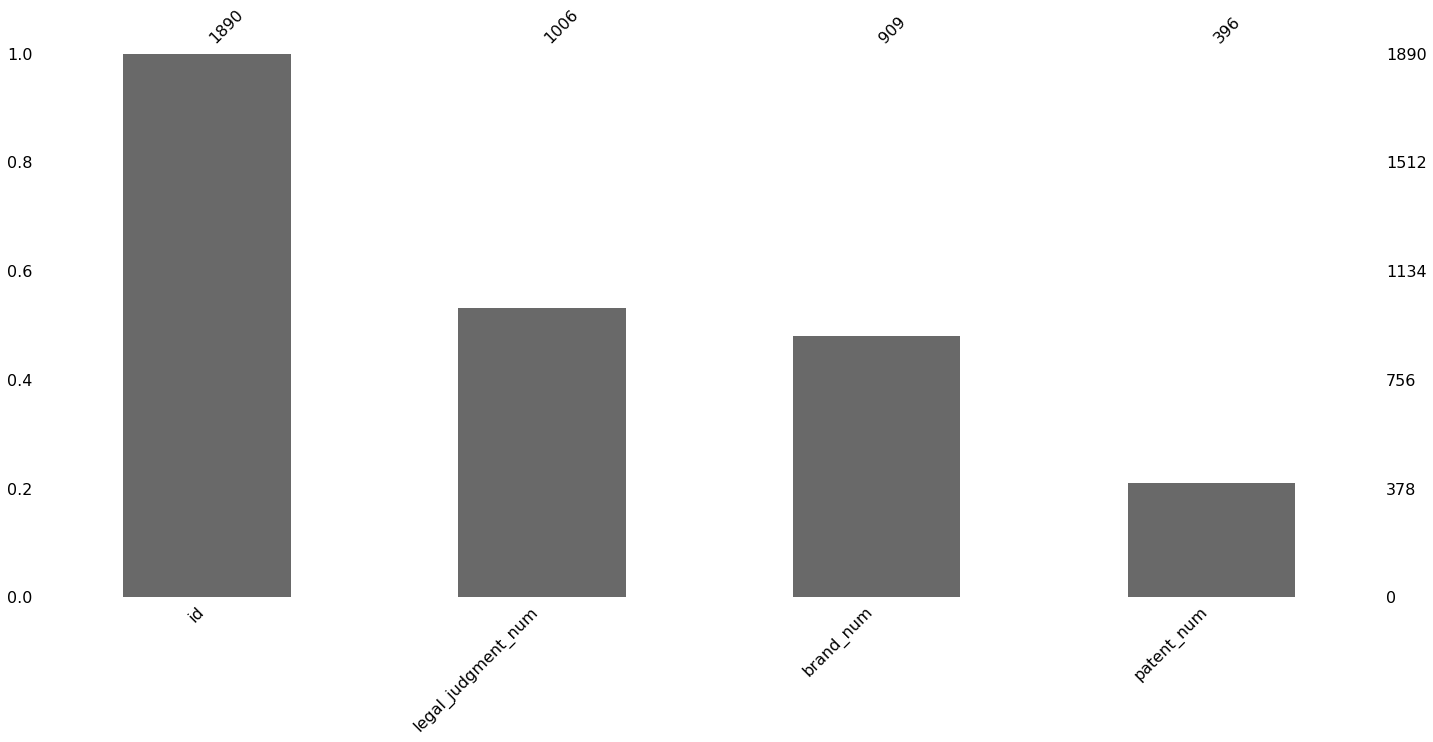

In [10]:
# ------------------other_info-------------------
print("other_info 数据大小")
print(other_info.shape, other_info['id'].nunique())
other_info.head(3)

# 查看缺失值
msno.bar(other_info)

# 查看表字段属性个数
for col in other_info.columns:
    print(col, other_info[col].nunique())

# corr协方差分析
other_info.corr()

In [11]:
# -----------------entprise_info---------------
entprise_info.head(1)
entprise_info.shape

(14865, 2)

In [12]:
# -----------------entprise_evaluate---------------
entprise_evaluate.head(1)
entprise_evaluate.shape

(10000, 2)

In [13]:
'*********************数据处理*************************'
def filter_col_by_nan(df, ratio=0.05):
    cols = []
    for col in df.columns:
        if df[col].isna().mean() >= (1-ratio):
            cols.append(col)
    return cols

# 剔除纯空列
base_info = base_info.drop(filter_col_by_nan(base_info, 0.01), axis=1)
annual_report_info = annual_report_info.drop(filter_col_by_nan(annual_report_info, 0.01), axis=1)


# 年报处理
annual_report_info_df = annual_report_info.groupby('id').agg({
    'ANCHEYEAR': ['max'],
    'STATE': ['max'],
    'FUNDAM': ['max'],
    'EMPNUM': ['max'],
    'UNEEMPLNUM': ['max', 'sum']
})
annual_report_info_df.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() 
                                for e in annual_report_info_df.columns.tolist()])
annual_report_info_df = annual_report_info_df.reset_index()


# 新闻处理
'处理时间'
news_info['public_date'] = news_info['public_date'].apply(lambda x: x if '-' in str(x) else np.nan)
news_info['public_date'] = pd.to_datetime(news_info['public_date'])
news_info['public_date'] = (datetime.now() - news_info['public_date']).dt.days
'处理新闻个数信息'
news_info_df = news_info.groupby('id').agg({'public_date': ['count','max','min','mean']}).reset_index()
news_info_df.columns = ['id', 'public_date_COUNT', 'public_MAX', 'public_MIN', 'public_MEAN']
news_info_df2 = pd.pivot_table(news_info, index='id', columns='positive_negtive', aggfunc='count').reset_index()
news_info_df2.columns = ['id', 'news_COUNT1', 'news_COUNT2', 'news_COUNT3']
news_info_df = pd.merge(news_info_df, news_info_df2)


# 税务信息
tax_info_df = tax_info.groupby('id').agg({
    'TAX_CATEGORIES': ['count'],
    'TAX_ITEMS': ['count'],
    'TAXATION_BASIS': ['count'],
    'TAX_AMOUNT': ['max', 'min', 'mean'],
})
tax_info_df.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() 
                                for e in tax_info_df.columns.tolist()])
tax_info_df = tax_info_df.reset_index()

# 变更信息
change_info['bgrq'] = (change_info['bgrq'] / 10000000000).astype(int)
change_info_df = change_info.groupby('id').agg({
    'bgxmdm': ['count', 'nunique'],
    'bgq':['nunique'],
    'bgh': ['nunique'],
    'bgrq': ['nunique'],
})
change_info_df.columns = pd.Index(['changeinfo_' + e[0] + "_" + e[1].upper() 
                                for e in change_info_df.columns.tolist()])
change_info_df = change_info_df.reset_index()


# 其它信息
other_info = other_info[~other_info['id'].duplicated()]
other_info['other_SUM'] = other_info[['legal_judgment_num', 'brand_num', 'patent_num']].sum(1)
other_info['other_NULL_SUM'] = other_info[['legal_judgment_num', 'brand_num', 'patent_num']].isnull().astype(int).sum(1)

In [14]:
# 基本信息处理
print(base_info.info())

## 字段转换
base_info['district_FLAG1'] = (base_info['orgid'].fillna('').apply(lambda x: str(x)[:6]) == \
    base_info['oplocdistrict'].fillna('').apply(lambda x: str(x)[:6])).astype(int)
base_info['district_FLAG2'] = (base_info['orgid'].fillna('').apply(lambda x: str(x)[:6]) == \
    base_info['jobid'].fillna('').apply(lambda x: str(x)[:6])).astype(int)
base_info['district_FLAG3'] = (base_info['oplocdistrict'].fillna('').apply(lambda x: str(x)[:6]) == \
    base_info['jobid'].fillna('').apply(lambda x: str(x)[:6])).astype(int)

## 员工数量处理，保留员工总数
base_info['person_SUM'] = base_info[['empnum', 'parnum', 'exenum']].sum(1)
base_info['person_NULL_SUM'] = base_info[['empnum', 'parnum', 'exenum']].isnull().astype(int).sum(1)

## 处理时间获得企业经营时间
base_info['opfrom'] = pd.to_datetime(base_info['opfrom'])
base_info['opto'] = pd.to_datetime(base_info['opto'])
base_info['opfrom_TONOW'] = (datetime.now() - base_info['opfrom']).dt.days
base_info['opfrom_TIME'] = (base_info['opto'] - base_info['opfrom']).dt.days

## 经营范围数量
base_info['opscope_COUNT'] = base_info['opscope'].apply(lambda x: len(x.replace("\t", "，").replace("\n", "，").split('、')))


cat_col = ['oplocdistrict', 'industryphy', 'industryco', 'enttype',
           'enttypeitem', 'enttypeminu', 'enttypegb',
          'dom', 'oploc', 'opform']

for col in cat_col:
    base_info[col + '_COUNT'] = base_info[col].map(base_info[col].value_counts())
    col_idx = base_info[col].value_counts()
    for idx in col_idx[col_idx < 10].index:
        base_info[col] = base_info[col].replace(idx, -1)        

base_info = base_info.drop(['opfrom', 'opto'], axis=1)

for col in ['industryphy', 'dom', 'opform', 'oploc']:
    base_info[col] = pd.factorize(base_info[col])[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24865 entries, 0 to 24864
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             24865 non-null  object 
 1   oplocdistrict  24865 non-null  int64  
 2   industryphy    24865 non-null  object 
 3   industryco     24864 non-null  float64
 4   dom            24865 non-null  object 
 5   opscope        24865 non-null  object 
 6   enttype        24865 non-null  int64  
 7   enttypeitem    16651 non-null  float64
 8   opfrom         24865 non-null  object 
 9   opto           8825 non-null   object 
 10  state          24865 non-null  int64  
 11  orgid          24865 non-null  int64  
 12  jobid          24865 non-null  int64  
 13  adbusign       24865 non-null  int64  
 14  townsign       24865 non-null  int64  
 15  regtype        24865 non-null  int64  
 16  empnum         19615 non-null  float64
 17  compform       10631 non-null  float64
 18  parnum

In [23]:
'***************数据拼接******************'
train_data = pd.merge(base_info, entprise_info, on='id')
train_data = pd.merge(train_data, other_info, on='id', how='left')

train_data = pd.merge(train_data, news_info_df, on='id', how='left')
train_data = pd.merge(train_data, tax_info_df, on='id', how='left')
train_data = pd.merge(train_data, annual_report_info_df, on='id', how='left')
train_data = pd.merge(train_data, change_info_df, on='id', how='left')

entprise_evaluate = entprise_evaluate[['id']]
test_data = pd.merge(base_info, entprise_evaluate, on='id')
test_data = pd.merge(test_data, other_info, on='id', how='left')
test_data = pd.merge(test_data, news_info_df, on='id', how='left')
test_data = pd.merge(test_data, tax_info_df, on='id', how='left')
test_data = pd.merge(test_data, annual_report_info_df, on='id', how='left')
test_data = pd.merge(test_data, change_info_df, on='id', how='left')

train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14865 entries, 0 to 14864
Data columns (total 75 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         14865 non-null  object 
 1   oplocdistrict              14865 non-null  int64  
 2   industryphy                14865 non-null  int64  
 3   industryco                 14864 non-null  float64
 4   dom                        14865 non-null  int64  
 5   opscope                    14865 non-null  object 
 6   enttype                    14865 non-null  int64  
 7   enttypeitem                10228 non-null  float64
 8   state                      14865 non-null  int64  
 9   orgid                      14865 non-null  int64  
 10  jobid                      14865 non-null  int64  
 11  adbusign                   14865 non-null  int64  
 12  townsign                   14865 non-null  int64  
 13  regtype                    14865 non-null  int

# 模型搭建

## 评价函数 与 K折训练

In [154]:
'*********************模型搭建********************'
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

def eval_score(y_test,y_pre):
    _,_,f_class,_=precision_recall_fscore_support(y_true=y_test,y_pred=y_pre,labels=[0,1],average=None)
    fper_class={'合法':f_class[0],'违法':f_class[1],'f1':f1_score(y_test,y_pre)}
    return fper_class

his_y = []


def k_fold_serachParmaters(model,train_val_data,train_val_kind,test_kind,flag=False,k_fold=10):
    mean_f1=0
    mean_f1Train=0
    n_splits=k_fold
    
    his = []

    sk = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2623)
    
    pred_Test = np.zeros(len(test_kind))
    for train, test in sk.split(train_val_data, train_val_kind):
        x_train = train_val_data.iloc[train]
        y_train = train_val_kind.iloc[train]
        x_test = train_val_data.iloc[test]
        y_test = train_val_kind.iloc[test]
        
        evals_result = {}

        model.fit(x_train, y_train, 
                  eval_set=[(x_test, y_test)], 
                  verbose=1000，
                  plot=flag
                 )
        
        pred = model.predict(x_test)
        fper_class = eval_score(y_test,pred)
        
        pred_Train = model.predict(x_train)
        pred_Test += model.predict_proba(test_kind)[:, 1]/n_splits
        fper_class_train = eval_score(y_train,pred_Train)
        
        
        

        mean_f1 += fper_class['f1']/n_splits
        mean_f1Train+=fper_class_train['f1']/n_splits
        
        
    his_y.append(mean_f1)
        #print(mean_f1, mean_f1Train)
        
        
    return mean_f1, pred_Test

## CatBoostClassifier 单独训练

In [172]:
score_tta = None
score_list = []
clf=CatBoostClassifier(
       loss_function="Logloss",
       eval_metric="F1",
       task_type="CPU",
       learning_rate=0.02,
       iterations=10000,
       random_seed=2020,
       od_type="Iter",
       depth=8,
       early_stopping_rounds=300,
   )

score, test_pred  = k_fold_serachParmaters(clf,
                       train_data.drop(['id', 'opscope','label'], axis=1),
                       train_data['label'],
                       test_data.drop(['id', 'opscope'], axis=1),
                       flag=True,k_fold=2,
                      )
print(score)

0:	learn: 0.7426956	test: 0.7531220	best: 0.7531220 (0)	total: 19.3ms	remaining: 3m 12s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.8394308943
bestIteration = 362

Shrink model to first 363 iterations.
0:	learn: 0.7319244	test: 0.6853933	best: 0.6853933 (0)	total: 16.8ms	remaining: 2m 48s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.8419979613
bestIteration = 350

Shrink model to first 351 iterations.
0.8407144277864796


In [183]:
import shap
import catboost
shap.initjs()

shap_values = model.get_feature_importance(pool(X, y, cat_features=cat_features), type='ShapValues')

shap.summary_plot(shap_values, X)

NameError: name 'pool' is not defined

In [151]:
score_tta = None
score_list = []
tta_fold = 3

start = datetime.now()
for _ in range(tta_fold):
    
    clf=CatBoostClassifier(
           loss_function="Logloss",
           eval_metric="F1",
           task_type="CPU",
           learning_rate=0.01,
           iterations=10000,
           random_seed=2020,
           od_type="Iter",
           depth=8,
           early_stopping_rounds=500,
       )

    score, test_pred  = k_fold_serachParmaters(clf,
                           train_data.drop(['id', 'opscope','label'], axis=1),
                           train_data['label'],
                           test_data.drop(['id', 'opscope'], axis=1),
                          )

    if score_tta is None:
        score_tta = test_pred/tta_fold
    else:
        score_tta += test_pred/tta_fold
    # print(score)
    score_list.append(score)

print(np.array(score_list).mean(), np.array(score_list).std())
print(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
print('用时: %d s' % (int((datetime.now() - start).seconds)))

0:	learn: 0.7157638	test: 0.7234043	best: 0.7234043 (0)	total: 18.1ms	remaining: 3m
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.8324873096
bestIteration = 406

Shrink model to first 407 iterations.
0:	learn: 0.7928654	test: 0.8172043	best: 0.8172043 (0)	total: 19.7ms	remaining: 3m 17s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.8820512821
bestIteration = 172

Shrink model to first 173 iterations.
0:	learn: 0.7156744	test: 0.7252747	best: 0.7252747 (0)	total: 24.7ms	remaining: 4m 6s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.85
bestIteration = 73

Shrink model to first 74 iterations.
0:	learn: 0.7602459	test: 0.7368421	best: 0.7368421 (0)	total: 31.6ms	remaining: 5m 15s
1000:	learn: 0.9549042	test: 0.8080808	best: 0.8241206 (537)	total: 18.6s	remaining: 2m 47s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.824120603
bestIteration = 537

Shrink model to first 538 iterations.
0:	learn: 0.7415

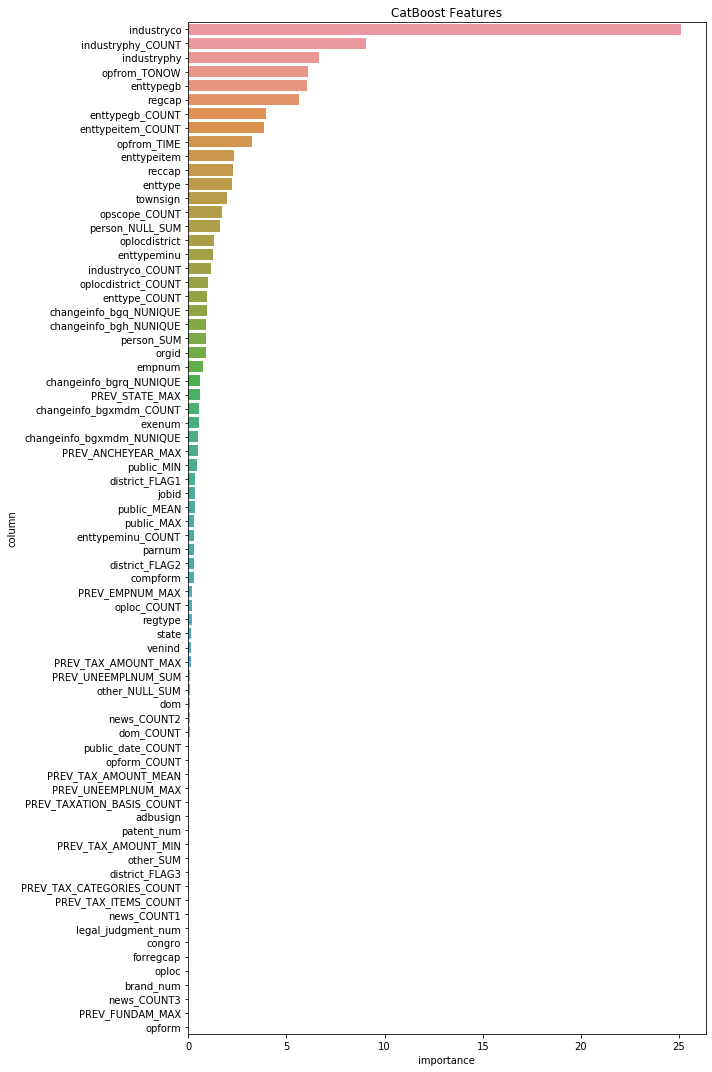

In [152]:
feature_names_pd = pd.DataFrame({'column': clf.feature_names_,
                                 'importance': clf.feature_importances_,
                                 })
plt.figure(figsize=(10, 15))
sns.barplot(x="importance", y="column", data=feature_names_pd.sort_values(by="importance", ascending=False))
plt.title('CatBoost Features')
plt.tight_layout()

In [171]:
lg = clf=CatBoostClassifier(
    iterations=5000,
    random_seed=2020,
    od_type='Iter',
    task_type="CPU",
    loss_function='Logloss'
)
param_dist = {'depth': [7,8,9],
              'learning_rate' : [0.01,0.05],
           #   "iterations": [5000, 7000, 10000],
            #  'l2_leaf_reg': [1,4,9],
           #   'early_stopping_rounds':[500,1000],
          #'loss_function':['MultiClass','Logloss'],
             }

grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 5, scoring='f1', verbose=5)
grid_search.fit(train_data.drop(['id', 'opscope','label'], axis=1),
                           train_data['label'])
grid_search.best_estimator_, grid_search.best_score_


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 13.9min


KeyboardInterrupt: 

## LGBMClassifier

Training until validation scores don't improve for 500 rounds
Did not meet early stopping. Best iteration is:
[143]	valid_0's binary_logloss: 0.0620148
Training until validation scores don't improve for 500 rounds
Did not meet early stopping. Best iteration is:
[150]	valid_0's binary_logloss: 0.0474895
Training until validation scores don't improve for 500 rounds
Did not meet early stopping. Best iteration is:
[149]	valid_0's binary_logloss: 0.0532719
Training until validation scores don't improve for 500 rounds
Did not meet early stopping. Best iteration is:
[150]	valid_0's binary_logloss: 0.0594372
Training until validation scores don't improve for 500 rounds
Did not meet early stopping. Best iteration is:
[150]	valid_0's binary_logloss: 0.0497134
Training until validation scores don't improve for 500 rounds
Did not meet early stopping. Best iteration is:
[150]	valid_0's binary_logloss: 0.056033
Training until validation scores don't improve for 500 rounds
Did not meet early stopping

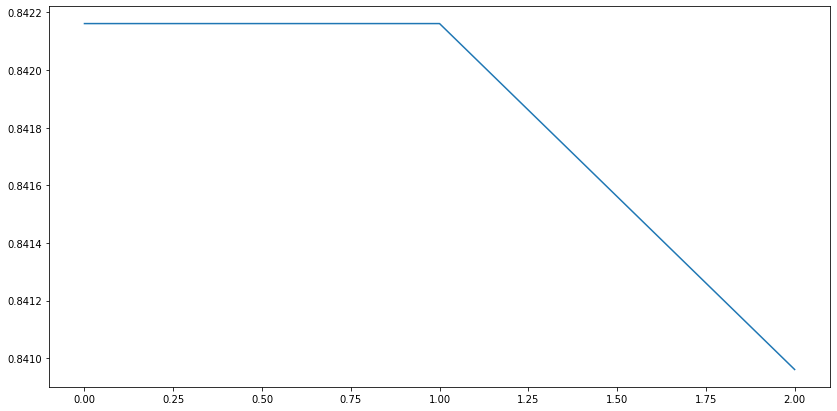

In [155]:
score_tta = None
score_list = []

tta_fold = 3
cat_features = []

for _ in range(tta_fold):
    clf = lgb.LGBMClassifier(
        num_leaves=np.random.randint(6, 10), min_child_samples= np.random.randint(2,5),
        max_depth=7,learning_rate=0.03,
        n_estimators=150,n_jobs=-1)

    score, test_pred  = k_fold_serachParmaters(clf,
                           train_data.drop(['id', 'opscope','label'], axis=1),
                           train_data['label'],
                           test_data.drop(['id', 'opscope'], axis=1),
                          )

    if score_tta is None:
        score_tta = test_pred/tta_fold
    else:
        score_tta += test_pred/tta_fold
    # print(score)
    score_list.append(score)
    
print(np.array(score_list).mean(), np.array(score_list).std())


In [153]:
his_s = []

features = ['oplocdistrict', 'industryphy', 'industryco', 'enttype','state',
           'enttypeitem', 'enttypeminu', 'enttypegb','reccap','compform','district_FLAG1','district_FLAG2','district_FLAG3',
          'dom', 'oploc', 'opform']

for i in range(24):
    cat_features = features[0:i]
    score_tta = None
    score_list = []

    tta_fold = 3

    for _ in range(tta_fold):
        clf = lgb.LGBMClassifier(
            num_leaves=np.random.randint(6, 10), min_child_samples= np.random.randint(2,5),
            max_depth=7,learning_rate=0.03,
            n_estimators=150,n_jobs=-1)

        score, test_pred  = k_fold_serachParmaters(clf,
                               train_data.drop(['id', 'opscope','label'], axis=1),
                               train_data['label'],
                               test_data.drop(['id', 'opscope'], axis=1),
                               cat_features,
                              )

        if score_tta is None:
            score_tta = test_pred/tta_fold
        else:
            score_tta += test_pred/tta_fold
        # print(score)
        score_list.append(score)
    
    his_s.append(np.array(score_list).mean())
    print(np.array(score_list).mean(), np.array(score_list).std())
    

plt.plot(his_s)
plt.show()

TypeError: fit() got an unexpected keyword argument 'plot'

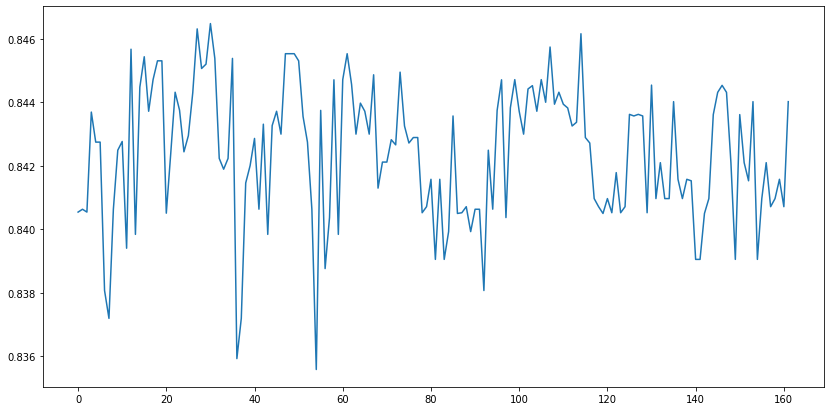

In [78]:
plt.plot(his_y)
plt.show()

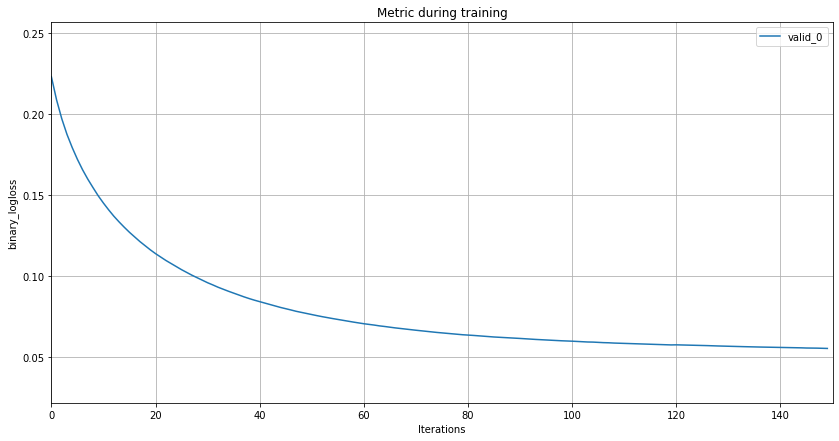

In [66]:
ax = lgb.plot_metric(clf)
plt.rcParams["figure.figsize"] = (10, 5)
plt.show()

In [159]:
lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [4,5,7],
              "learning_rate" : [0.01,0.05],
              "num_leaves": [5, 7, 8],
              "n_estimators": [50, 100, 150]
             }

cat_features = ['oplocdistrict', 'industryphy', 'industryco', 'enttype',
           'enttypeitem', 'enttypeminu', 'enttypegb',
          'dom', 'oploc', 'opform']

grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 5, scoring='f1', verbose=5)
grid_search.fit(train_data.drop(['id', 'opscope','label'], axis=1),
                           train_data['label'], categorical_feature = cat_features,)
grid_search.best_estimator_, grid_search.best_score_


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   46.4s finished


(LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.05, max_depth=5,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=150, n_jobs=-1, num_leaves=7, objective=None,
                random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 0.8468010964764001)

In [ ]:
s = grid_search.score
plt.plot(grid_search.score)
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(his_y)
plt.show()

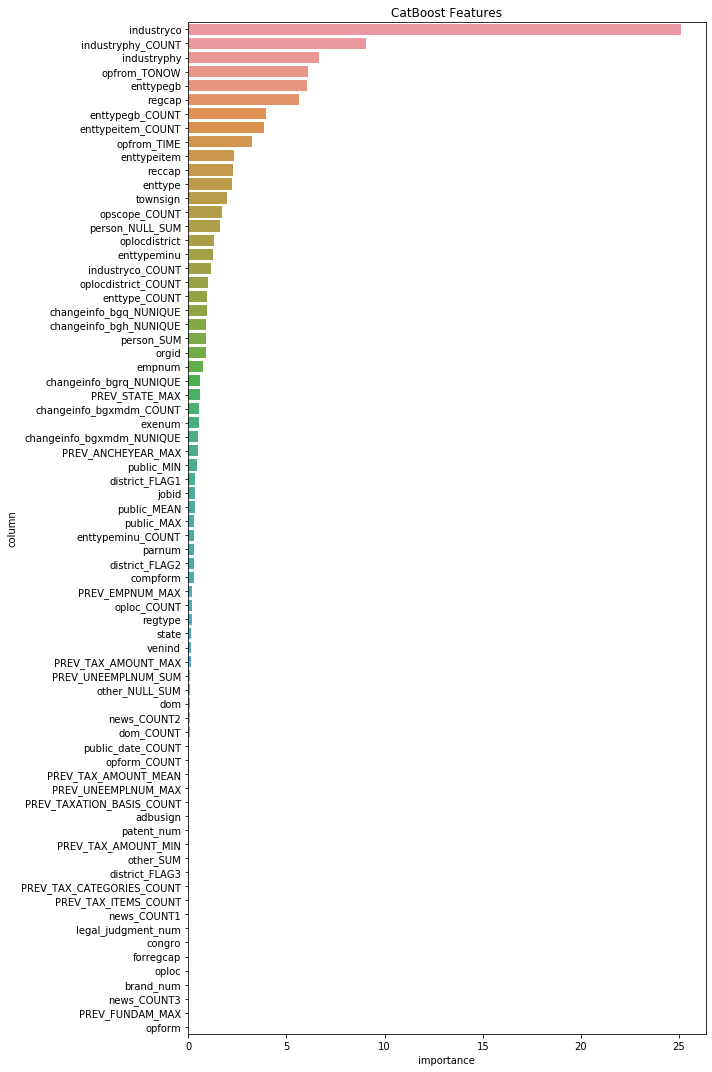

In [148]:
feature_names_pd = pd.DataFrame({'column': clf.feature_names_,
                                 'importance': clf.feature_importances_,
                                 })
plt.figure(figsize=(10, 15))
sns.barplot(x="importance", y="column", data=feature_names_pd.sort_values(by="importance", ascending=False))
plt.title('CatBoost Features')
plt.tight_layout()

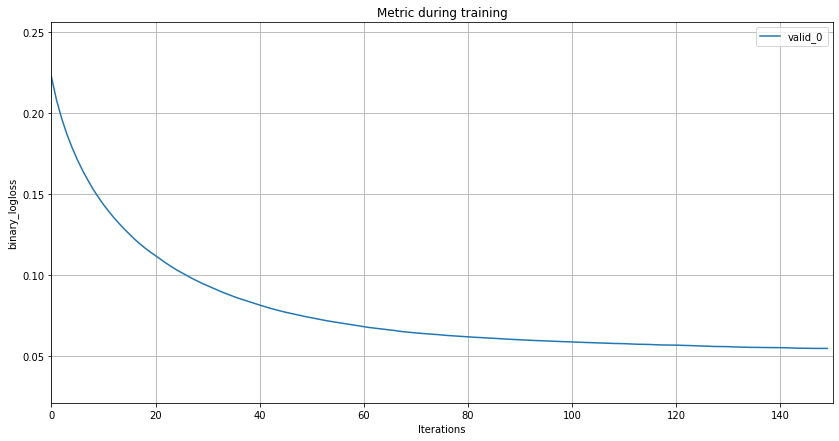

In [156]:
ax = lgb.plot_metric(clf)
plt.rcParams["figure.figsize"] = (10, 5)
plt.show()

In [54]:
base_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24865 entries, 0 to 24864
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   24865 non-null  object 
 1   oplocdistrict        24865 non-null  int64  
 2   industryphy          24865 non-null  int64  
 3   industryco           24864 non-null  float64
 4   dom                  24865 non-null  int64  
 5   opscope              24865 non-null  object 
 6   enttype              24865 non-null  int64  
 7   enttypeitem          16651 non-null  float64
 8   state                24865 non-null  int64  
 9   orgid                24865 non-null  int64  
 10  jobid                24865 non-null  int64  
 11  adbusign             24865 non-null  int64  
 12  townsign             24865 non-null  int64  
 13  regtype              24865 non-null  int64  
 14  empnum               19615 non-null  float64
 15  compform             10631 non-null 

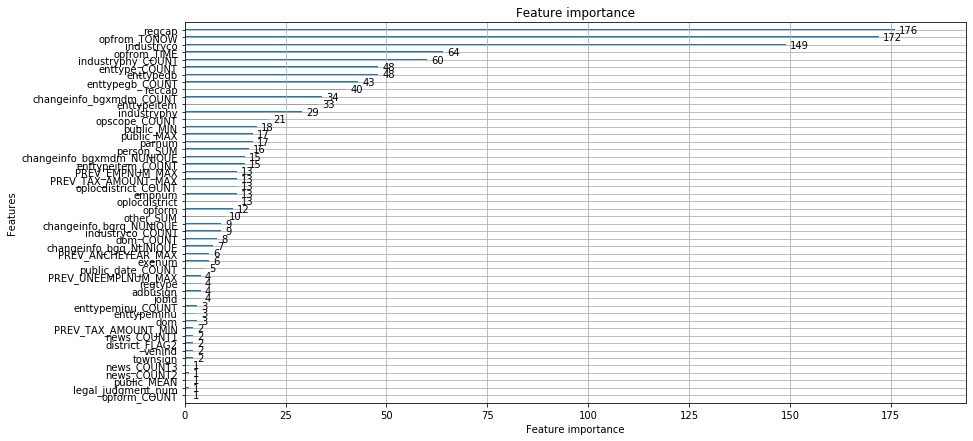

In [158]:
lgb.plot_importance(clf)
plt.rcParams["figure.figsize"] = (14, 10)
plt.show()

In [ ]:
sns.set()
fpr, tpr, thresh = roc_curve(y_train,pred_Train)
plt.plot(fpr, tpr)
plt.show()